<a href="https://colab.research.google.com/github/Tom-atok/Tom-atok/blob/master/colab_notebooks/DAG_japanese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAG(Directed Acyclic Graph: 有向非循環グラフ)を `matplotlib`と`networkx`で日本語フォントを用いて表現する方法

## 日本語をフォントをダウンロードする

In [1]:
!apt-get -y install fonts-ipafont-gothic
!rm -rf /root/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 2s (4,024 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

**ここで一回セッションを再起動する！**
- キャッシュクリアのため

## グラフを描写する
ここでは「『民族関係の都市社会学―大阪猪飼野のフィールドワーク』谷富夫著、2015年、ミネルヴァ書房」第八章: 分析と考察，第一節: 職人層の形成を例として用いている


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'IPAGothic'  # IPAGothicまたは使用した日本語フォントに設定


In [2]:
import networkx as nx

# 空の有向グラフを作成
G = nx.DiGraph()

# ノードを追加
nodes = ["朝鮮人", "職人", "ボーダーライン層", "ニッチ産業", "不安定性", "結合パターン"]
G.add_nodes_from(nodes)

# エッジを追加（有向）
edges = [("朝鮮人", "職人"), ("職人", "ボーダーライン層"), ("ボーダーライン層", "不安定性"),
         ("朝鮮人", "ニッチ産業"), ("ニッチ産業", "不安定性"), ("職人", "結合パターン")]
G.add_edges_from(edges)

is_dag = nx.is_directed_acyclic_graph(G)
print("Is the graph a DAG?:", is_dag)


Is the graph a DAG?: True


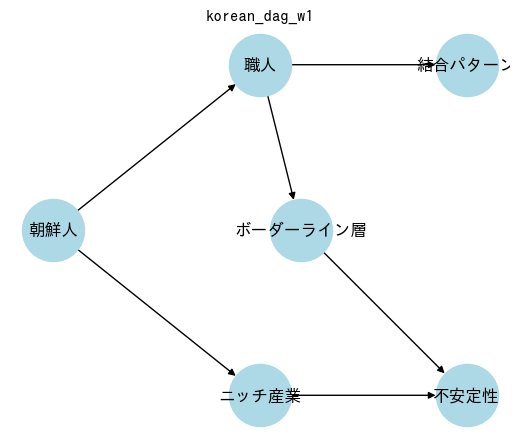

In [3]:
# 自動でノード位置を計算（ここではspring_layoutを使用）
pos = {'朝鮮人': (-1, 0), '不安定性': (1,-0.1), '結合パターン': (1, 0.1), '職人': (0,0.1),
       'ニッチ産業':(0, -0.1), 'ボーダーライン層': (0.2,0)}  # 位置を(x, y)形式で指定

# posにすでに存在するノードはその位置が固定され，残りは自動的に配置される
# 「遠そうな」ノードを手動で遠くして，ほつれをほぐしていくと綺麗な図が描ける
pos = nx.spring_layout(G, pos=pos,fixed=list(pos.keys()))

# グラフの可視化
plt.figure(figsize=(5,4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=12, font_family='IPAGothic', node_size=2000, font_weight='bold', arrows=True)

title = 'korean_dag_w1'
plt.title(title)
plt.savefig(f'{title}.png')
plt.show()



## 複雑なバージョン
8章小括を参考に概念を整理

In [15]:
import networkx as nx

# 空の有向グラフを作成
G = nx.DiGraph()

# ノードを追加
nodes = ["朝鮮人", "職人", "ボーダーライン層", "ニッチ産業", "不安定性", "結合パターン",
         "自力主義","家族・親族結合","階層移動","世代間再生産","狭い職業選択幅",
         "日本人を含む近隣結合","のれん分け","徒弟制","世代間継承力"]
G.add_nodes_from(nodes)

# エッジを追加（有向）
edges = [("職人", "ボーダーライン層"), ("ボーダーライン層", "不安定性"),
         ("朝鮮人", "ニッチ産業"), ("ニッチ産業", "不安定性"),
         ("朝鮮人","家族・親族結合"),
          ("日本人を含む近隣結合","結合パターン"),
         ("朝鮮人","狭い職業選択幅"),("狭い職業選択幅","職人"),
          ("家族・親族結合","階層移動"),
         ("自力主義","階層移動"),("日本人を含む近隣結合","階層移動"),
         ("狭い職業選択幅","世代間再生産"),("自力主義","家族・親族結合"),
         ("職人","自力主義"),("のれん分け","世代間再生産"),
         ("職人","徒弟制"),("徒弟制","のれん分け"),("自力主義","のれん分け"),
         ("徒弟制","日本人を含む近隣結合"),
         ("不安定性","階層移動",{'label': '-'}),("世代間再生産","階層移動",{'label': '-'}),
         ("世代間再生産","世代間継承力"),("ボーダーライン層","家族・親族結合"),("のれん分け","結合パターン"),
         ("不安定性","自力主義"),]
G.add_edges_from(edges)

is_dag = nx.is_directed_acyclic_graph(G)
print("Is the graph a DAG?:", is_dag)



Is the graph a DAG?: True


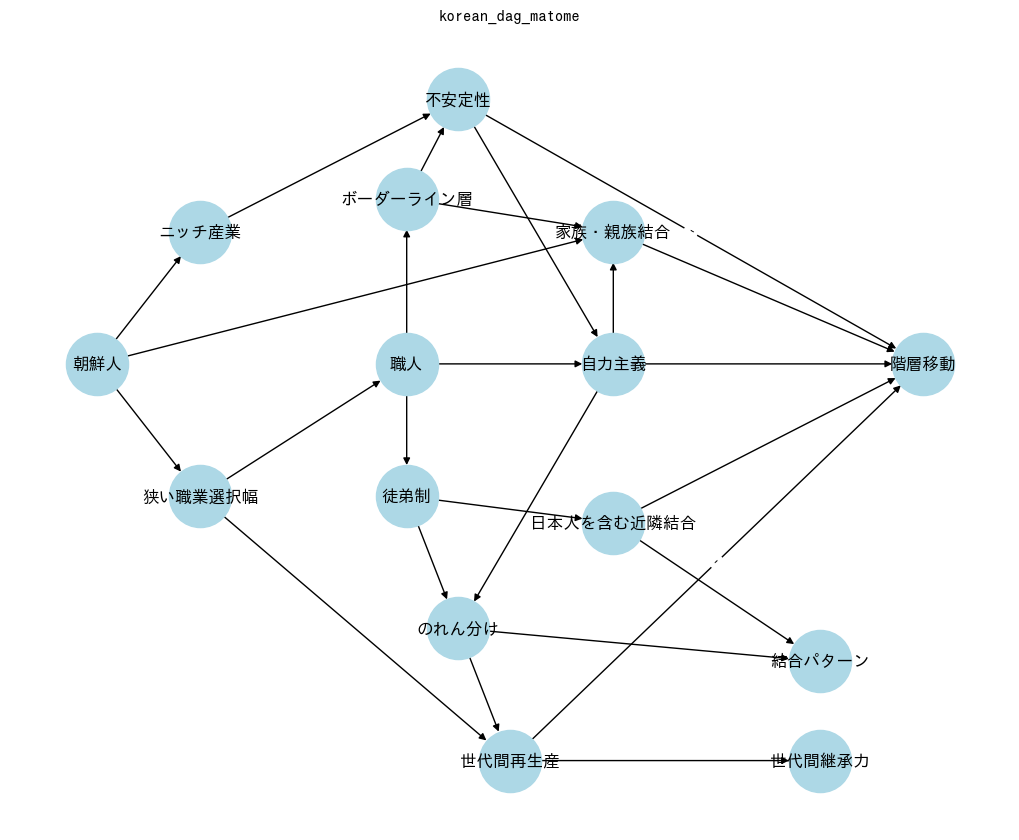

In [17]:
# ノードの位置を手動で設定
pos = {'朝鮮人': (-4, 0),
       'ニッチ産業':(-3,1),'狭い職業選択幅':(-3,-1),
       '職人':(-1,0),'徒弟制':(-1,-1),'ボーダーライン層':(-1,1.25),
       'のれん分け':(-0.5,-2),'不安定性': (-0.5,2),
       '世代間再生産':(0,-3),
       '自力主義':(1,0),'家族・親族結合':(1,1),'日本人を含む近隣結合':(1,-1.2),
       '世代間継承力':(3,-3),
       '結合パターン':(3,-2.25),
       '階層移動':(4,0)}

# 自動レイアウトアルゴリズムの適用
# posにすでに存在するノードはその位置が固定され，残りは自動的に配置される
# 「遠そうな」ノードを手動で遠くして，ほつれをほぐしていくと綺麗な図が描ける
pos = nx.spring_layout(G, pos=pos,fixed=list(pos.keys()))

# グラフの可視化
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=12,
        font_family='IPAGothic', node_size=2000, font_weight='bold', arrows=True)

# エッジラベルの描画
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

title = 'korean_dag_matome'
plt.title(title)
plt.savefig(f'{title}.png')
plt.show()



# パスの探索

In [18]:
all_paths = list(nx.all_simple_paths(G, source='朝鮮人', target='階層移動'))
all_paths

[['朝鮮人', 'ニッチ産業', '不安定性', '階層移動'],
 ['朝鮮人', 'ニッチ産業', '不安定性', '自力主義', '階層移動'],
 ['朝鮮人', 'ニッチ産業', '不安定性', '自力主義', '家族・親族結合', '階層移動'],
 ['朝鮮人', 'ニッチ産業', '不安定性', '自力主義', 'のれん分け', '世代間再生産', '階層移動'],
 ['朝鮮人', '家族・親族結合', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', 'ボーダーライン層', '不安定性', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', 'ボーダーライン層', '不安定性', '自力主義', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', 'ボーダーライン層', '不安定性', '自力主義', '家族・親族結合', '階層移動'],
 ['朝鮮人',
  '狭い職業選択幅',
  '職人',
  'ボーダーライン層',
  '不安定性',
  '自力主義',
  'のれん分け',
  '世代間再生産',
  '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', 'ボーダーライン層', '家族・親族結合', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', '自力主義', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', '自力主義', '家族・親族結合', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', '自力主義', 'のれん分け', '世代間再生産', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', '徒弟制', 'のれん分け', '世代間再生産', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '職人', '徒弟制', '日本人を含む近隣結合', '階層移動'],
 ['朝鮮人', '狭い職業選択幅', '世代間再生産', '階層移動']]